In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('Task 4.csv')
df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [4]:
#Adding column names to the data set
df=pd.read_csv('Task 4.csv', header=None)
df.columns=['ID','Topic','Sentiment','Text']
df.head()

,ID,Topic,Sentiment,Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [5]:
#Display the shape of the dataset
df.shape

(74682, 4)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         74682 non-null  int64 
 1   Topic      74682 non-null  object
 2   Sentiment  74682 non-null  object
 3   Text       73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [7]:
#Checking for null/missing values in the dataset
df.isnull().sum()

ID             0
Topic          0
Sentiment      0
Text         686
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df.isnull().sum()

ID           0
Topic        0
Sentiment    0
Text         0
dtype: int64

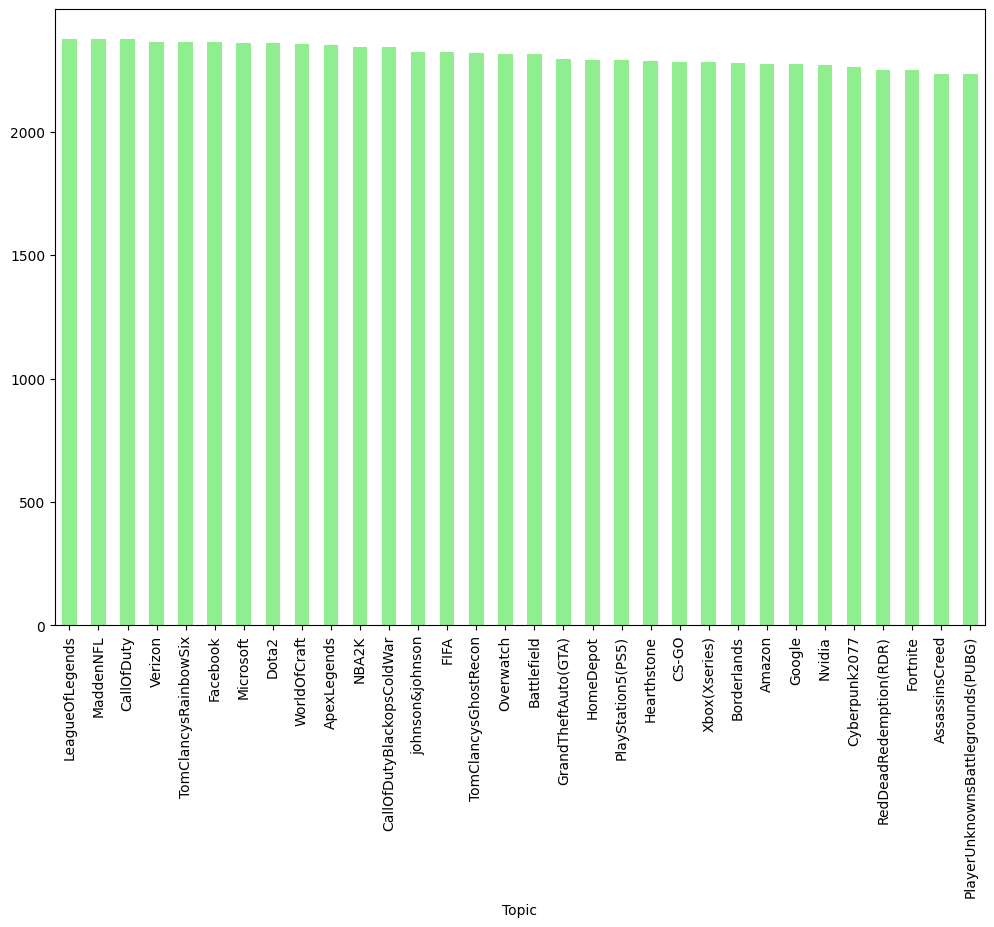

In [10]:
df['Topic'].value_counts().plot(kind='bar', color='lightgreen',figsize=(12,8))
plt.show()

In [11]:
sentiment_count=df.Sentiment.value_counts()
sentiment_count

Sentiment
Negative      22358
Positive      20655
Neutral       18108
Irrelevant    12875
Name: count, dtype: int64

In [12]:
df['Sentiment'].unique()

array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)

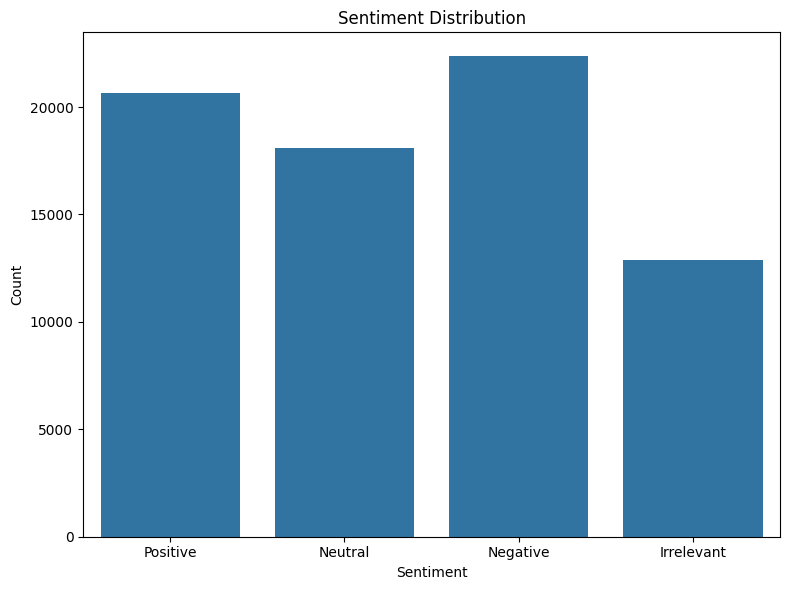

In [13]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x=df.columns[2], order=['Positive','Neutral','Negative','Irrelevant'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

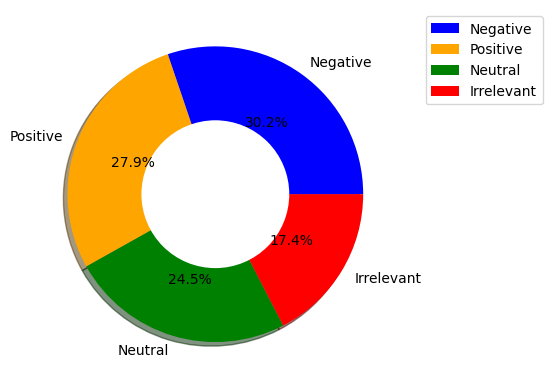

In [15]:
#creating a Donut chart for sentiment count
y=['Negative','Positive','Neutral','Irrelevant']
colors=['blue','orange','green','red']
plt.pie(sentiment_count, labels=y, autopct='%0.1f%%', colors=colors, shadow=True)
circle=plt.Circle((0,0), 0.5, facecolor='white')
plt.gca().add_artist(circle)
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.show()

In [16]:
#Description of the data
df_description_all=df.describe(include='all')
print(df_description_all)

                  ID            Topic Sentiment  \
count   73996.000000            73996     73996   
unique           NaN               32         4   
top              NaN  LeagueOfLegends  Negative   
freq             NaN             2377     22358   
mean     6430.279231              NaN       NaN   
std      3737.660027              NaN       NaN   
min         1.000000              NaN       NaN   
25%      3194.000000              NaN       NaN   
50%      6417.500000              NaN       NaN   
75%      9595.000000              NaN       NaN   
max     13200.000000              NaN       NaN   

                                                     Text  
count                                               73996  
unique                                              69489  
top     At the same time, despite the fact that there ...  
freq                                                  172  
mean                                                  NaN  
std                        

In [17]:
df['msg_len'] = df['Text'].apply(len)

In [18]:
df

,ID,Topic,Sentiment,Text,msg_len
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,53
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,51
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,50
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,51
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,57
...,...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...,128
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...,117
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...,125
74680,9200,Nvidia,Positive,Just realized between the windows partition of...,159


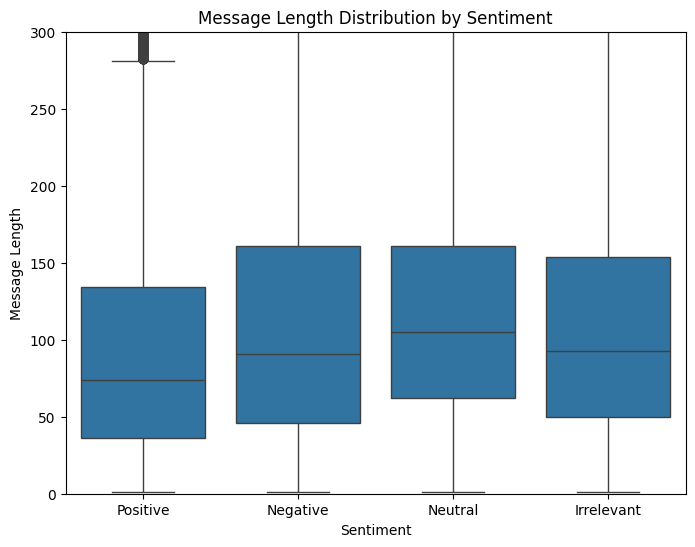

In [25]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x=df['Sentiment'], y='msg_len', order=['Positive','Negative','Neutral','Irrelevant'])
plt.title('Message Length Distribution by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Message Length')
plt.ylim(0,300)
plt.show()